In [1]:
from google.colab import files
uploaded = files.upload()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


# New Section

In [2]:
import pandas as pd
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [7]:
## removing the availabilty and society columns as they as not important factors for prediction

In [8]:
df.drop(['availability','society'],axis=1,inplace = True)
df.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [9]:
## unique values with their counts in each column
for col in df.columns:
  print(df[col].value_counts())
  print("\n\n")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64



location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64



size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            

In [10]:
# unique values in each column
for col in df.columns:
  print(f"{col} : {df[col].unique()}")
  print("\n")

area_type : ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


location : ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


size : ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


total_sqft : ['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


bath : [ 2.  5.  3.  4.  6.  1.  9. nan  8.  7. 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.]


balcony : [ 1.  3. nan  2.  0.]


price : [ 39.07 120.    62.   ...  40.14 231.   488.  ]




Data Cleaning And Handling

In [11]:
## problems in  the dataset
# 1. there are some null values -> location , size , bath ,balcony column

#  2. size column has data in different formats like BHK(2 BHK ) and bedroom( 3 Bedroom ) -> taking only the numeric parts like 2 , 3

# 3. unique values with very less count present in columns like location , size, bath etc -> filtered data and used 'others' for such values

# 4. data in different formats for total_sqft column

# 5. outliers removal

# 6. encoding req for columns like location and area_type



In [12]:
df.isnull().sum()

,0
area_type,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [13]:
## Problem 1

In [14]:
## can drop rows with null values for these columns as there count is less
df.dropna(subset=['location','size','bath'],axis=0,inplace=True)
df.isnull().sum()

,0
area_type,0
location,0
size,0
total_sqft,0
bath,0
balcony,536
price,0


In [15]:
### balcony has 536 null values so we can't drop those -> replacing those null values with the mean values
df['balcony'].replace(np.nan,df['balcony'].mean(),inplace = True )
df['balcony'].isnull().sum()

/tmp/ipython-input-3228018898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balcony'].replace(np.nan,df['balcony'].mean(),inplace = True )


np.int64(0)

In [16]:
# problem 2

In [17]:
df['BHK']= df['size'].apply(lambda x: int(x.split(' ')[0]))
df.drop(['size'],axis=1,inplace=True)
df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [18]:
# problem 3

In [19]:
## checking the count of different locations
locations_groups = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations_groups.head()

,location
location,
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
Thanisandra,233


In [20]:
locations_groups.tail()

,location
location,
bsk 6th stage 2ad block near sri conversation hall,1
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1
banashankari stage iii sa,1
"asha township, off hennur road",1


In [21]:
## will name unique locations having count< 20 as 'others'
filter = locations_groups >= 20
filter_locations = locations_groups[filter]

In [22]:
filter_locations.head()

,location
location,
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
Thanisandra,233


In [23]:
filter_locations.tail()

,location
location,
Sanjay nagar,20
Binny Pete,20
Yelachenahalli,20
Poorna Pragna Layout,20
HBR Layout,20


In [24]:
## locations not present in filtered_locations -> 'others'

In [25]:
df['location'] =df['location'].apply(lambda x : x if x in  filter_locations else 'others')

In [26]:
(df['location']=='others').sum()

np.int64(4214)

In [27]:
(df['location']!='others').sum()

np.int64(9032)

In [28]:
# problem 4

In [29]:
## will check if total_sqft value can be converted to float
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [30]:
df_total_sqft = df[~df['total_sqft'].apply(is_float)]
df_total_sqft.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2


In [31]:
## it shows total_sqft values present in ranges

In [32]:
def is_range(x):
  if'-' in x:
    return True
  return False

In [33]:
df_total_sqft2 = df_total_sqft[~df['total_sqft'].apply(is_range)]
df_total_sqft2['total_sqft']

/tmp/ipython-input-2369762386.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_total_sqft2 = df_total_sqft[~df['total_sqft'].apply(is_range)]


,total_sqft
410,34.46Sq. Meter
648,4125Perch
775,1000Sq. Meter
872,1100Sq. Yards
1019,5.31Acres
1086,30Acres
1400,716Sq. Meter
1712,1500Sq. Meter
1743,142.61Sq. Meter
1821,1574Sq. Yards


In [34]:
## shows total_sqft values in units

In [35]:
df_total_sqft2['total_sqft'].unique()

array(['34.46Sq. Meter', '4125Perch', '1000Sq. Meter', '1100Sq. Yards',
       '5.31Acres', '30Acres', '716Sq. Meter', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '361.33Sq. Yards',
       '117Sq. Yards', '3040Sq. Meter', '500Sq. Yards', '167Sq. Meter',
       '315Sq. Yards', '3Cents', '188.89Sq. Yards', '204Sq. Meter',
       '45Sq. Yards', '133.3Sq. Yards', '78.03Sq. Meter', '122Sq. Yards',
       '84.53Sq. Meter', '2.09Acres', '24Guntha', '697Sq. Meter',
       '1500Cents', '132Sq. Yards', '2Acres', '1100Sq. Meter', '15Acres',
       '1.26Acres', '151.11Sq. Yards', '1Grounds', '2940Sq. Yards',
       '45.06Sq. Meter', '1.25Acres', '86.72Sq. Meter', '38Guntha',
       '6Acres', '120Sq. Yards', '24Sq. Meter', '142.84Sq. Meter',
       '300Sq. Yards'], dtype=object)

In [36]:
#Sq.Meter, Perch, Sq.Yards, Acres, Cents, Guntha, Grounds.
#1 Sq.Meter = 10.76 sqft
#1 Perch = 272.25 sqft
#1 Sq.Yard = 9 sqft
#1 Acre = 43560.04 sqft
#1 Cent = 435.56 sqft
#1 Guntha = 1089 sqft
#1 Ground = 2400.35 sqft

In [37]:
def solve_units(x):
  if "Sq. Meter" in x:
    num = x.split("S")
    result = float(num[0]) *10.76
    return result

  elif "Perch" in x:
    num = x.split("P")
    result = float(num[0]) *272.25
    return result

  elif "Sq. Yards" in x:
    num = x.split("S")
    result = float(num[0]) *9
    return result

  elif "Acres" in x:
    num = x.split("A")
    result = float(num[0]) *43560.04
    return result

  elif "Cents" in x:
    num = x.split("C")
    result = float(num[0]) *435.56
    return result

  elif "Grounds" in x:
    num = x.split("G")
    result = float(num[0]) *2400.35
    return result

  elif "Guntha" in x:
    num = x.split("G")
    result = float(num[0]) *1089
    return result

  else:
    return float(x)

In [38]:
def convert_values(x):
  ## if it is a range
  if '-' in x:
    nums = x.split('-')
    result = (float(nums[0]) + float(nums[1]))/2
    return result
  else:
    bool_val = x.upper().isupper()
    ## if it is present as units
    if(bool_val):
        solve_units(x)
    ## if already present as a float
    else :
      return float(x)

In [39]:
df['total_sqft']=df['total_sqft'].apply(convert_values)

In [40]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [41]:
## renaming a column 'bath'

In [42]:
df.rename(columns={'bath':'bathrooms'},inplace=True)
df.columns

Index(['area_type', 'location', 'total_sqft', 'bathrooms', 'balcony', 'price',
       'BHK'],
      dtype='object')

In [43]:
## adding a new column 'price per sqft.' which will help to analyse outliers

In [44]:
df['price_per_sqft']=df['price']/df['total_sqft']
df.head()

,area_type,location,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0.036998
1,Plot Area,others,2600.0,5.0,3.0,120.00,4,0.046154
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,0.043056
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,0.062459
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,0.042500


In [45]:
## problem 5 - outliers removal

In [46]:
numeric_df=df.select_dtypes(include = np.number)
numeric_df.head()

,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft
0,1056.0,2.0,1.0,39.07,2,0.036998
1,2600.0,5.0,3.0,120.00,4,0.046154
2,1440.0,2.0,3.0,62.00,3,0.043056
3,1521.0,3.0,1.0,95.00,3,0.062459
4,1200.0,2.0,1.0,51.00,2,0.042500


In [47]:
## total_sqft

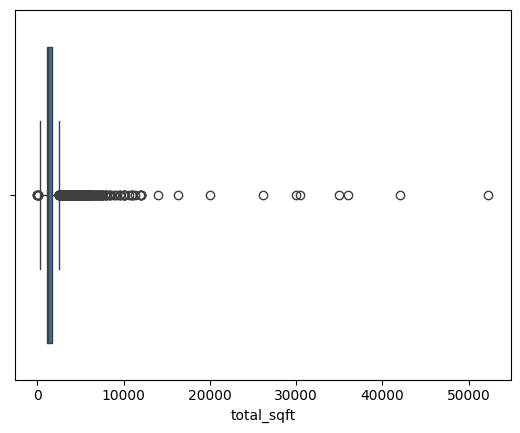

<Figure size 800x400 with 0 Axes>

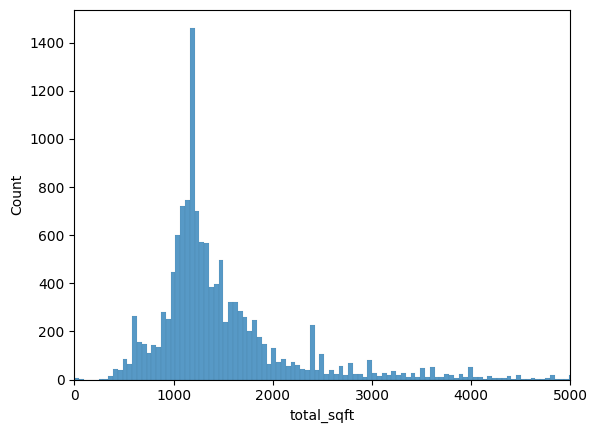

<Figure size 800x400 with 0 Axes>

In [48]:
sns.boxplot(x='total_sqft',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='total_sqft',data=df)
plt.xlim(0,5000)
plt.figure(figsize=(8,4))
plt.show()

In [49]:
df['total_sqft'].describe()

,total_sqft
count,13200.000000
mean,1555.302783
std,1237.323445
min,1.000000
25%,1100.000000
50%,1275.000000
75%,1672.000000
max,52272.000000


In [50]:
## using flooring and capping (total_sqft data is highly skewed)
lower_bound=df['total_sqft'].quantile(0.10)
upper_bound=df['total_sqft'].quantile(0.90)
df['total_sqft']=np.where(df['total_sqft']<lower_bound, lower_bound, df['total_sqft'])
df['total_sqft']=np.where(df['total_sqft']>upper_bound, upper_bound, df['total_sqft'])

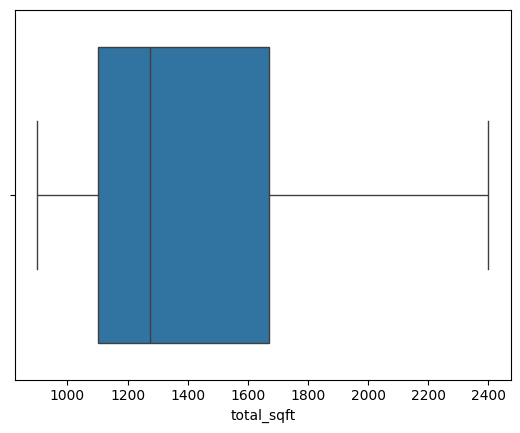

<Figure size 800x400 with 0 Axes>

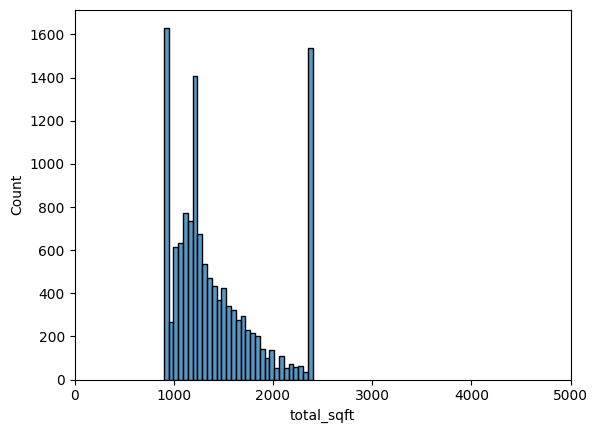

<Figure size 800x400 with 0 Axes>

In [51]:
sns.boxplot(x='total_sqft',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='total_sqft',data=df)
plt.xlim(0,5000)
plt.figure(figsize=(8,4))
plt.show()

In [52]:
df['total_sqft'].describe()

,total_sqft
count,13200.000000
mean,1435.856248
std,464.739483
min,900.000000
25%,1100.000000
50%,1275.000000
75%,1672.000000
max,2400.000000


In [53]:
# price

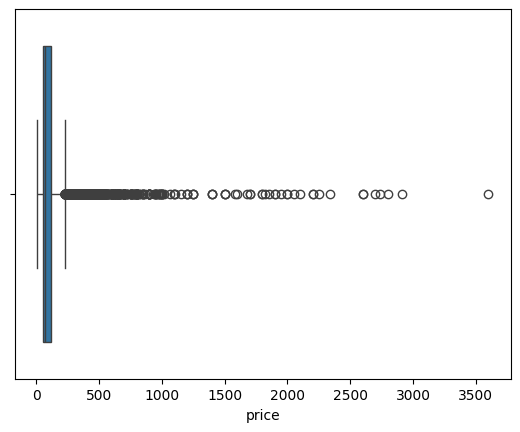

<Figure size 800x400 with 0 Axes>

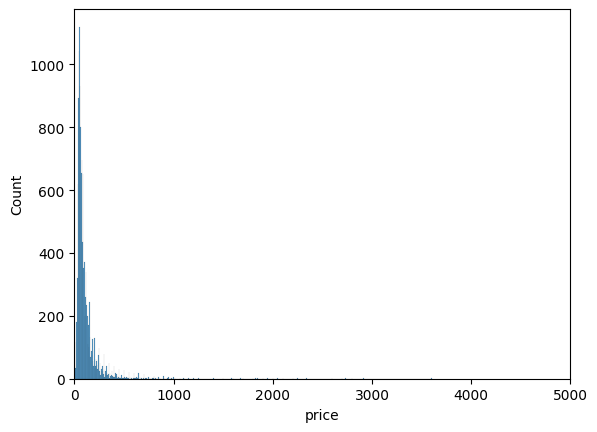

<Figure size 800x400 with 0 Axes>

In [54]:
sns.boxplot(x='price',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='price',data=df)
plt.xlim(0,5000)
plt.figure(figsize=(8,4))
plt.show()

In [55]:
df['price'].describe()

,price
count,13246.000000
mean,112.389392
std,149.076587
min,8.000000
25%,50.000000
50%,72.000000
75%,120.000000
max,3600.000000


In [56]:
lower_bound=df['price'].quantile(0.10)
upper_bound=df['price'].quantile(0.90)
df['price']=np.where(df['price']<lower_bound, lower_bound, df['price'])
df['price']=np.where(df['price']>upper_bound, upper_bound, df['price'])

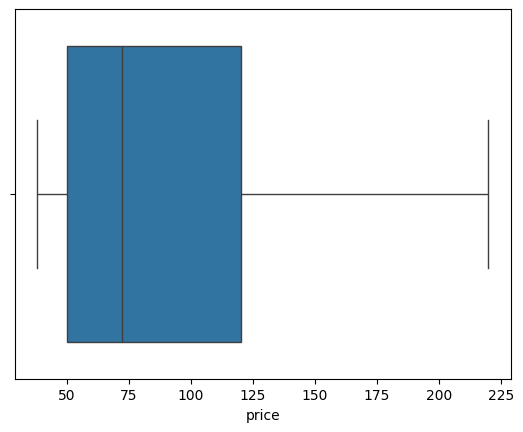

<Figure size 800x400 with 0 Axes>

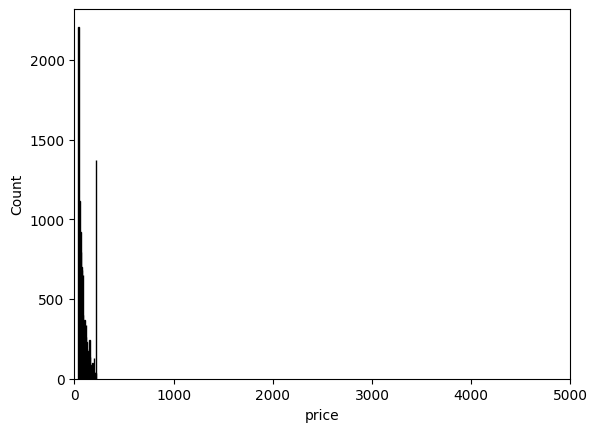

<Figure size 800x400 with 0 Axes>

In [57]:
sns.boxplot(x='price',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='price',data=df)
plt.xlim(0,5000)
plt.figure(figsize=(8,4))
plt.show()

In [58]:
df['price'].describe()

,price
count,13246.000000
mean,93.541210
std,57.585644
min,38.000000
25%,50.000000
50%,72.000000
75%,120.000000
max,220.000000


In [59]:
## balcony

In [60]:
df['balcony'].describe()

,balcony
count,13246.000000
mean,1.584343
std,0.800579
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


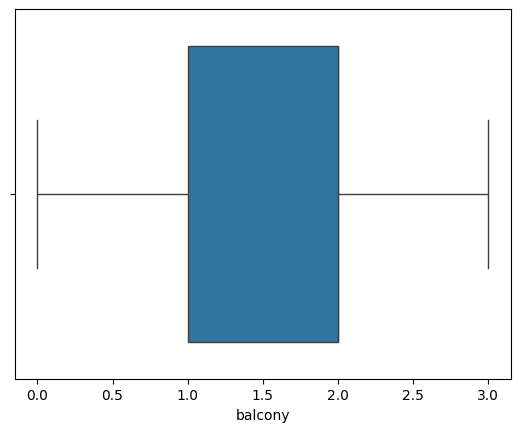

<Figure size 800x400 with 0 Axes>

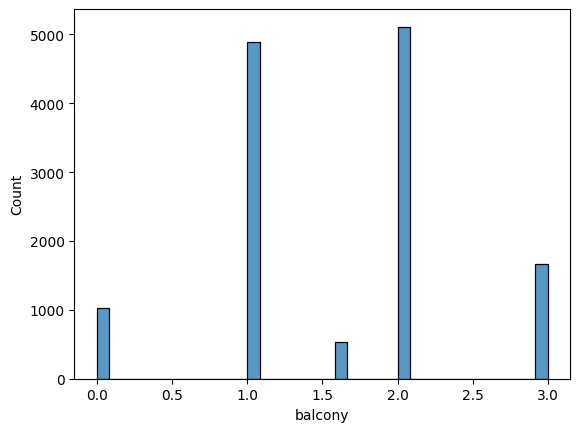

<Figure size 800x400 with 0 Axes>

In [61]:
sns.boxplot(x='balcony',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='balcony',data=df)
plt.figure(figsize=(8,4))
plt.show()

In [62]:
df['balcony']=df['balcony'].astype(int)

In [63]:
df.head()

,area_type,location,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1,39.07,2,0.036998
1,Plot Area,others,2400.0,5.0,3,120.00,4,0.046154
2,Built-up Area,Uttarahalli,1440.0,2.0,3,62.00,3,0.043056
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1,95.00,3,0.062459
4,Super built-up Area,Kothanur,1200.0,2.0,1,51.00,2,0.042500


In [64]:
# BHK

In [65]:
df['BHK'].describe()

,BHK
count,13246.000000
mean,2.801902
std,1.295758
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,43.000000


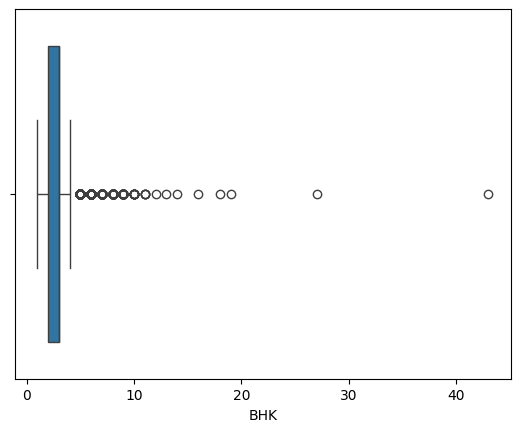

<Figure size 800x400 with 0 Axes>

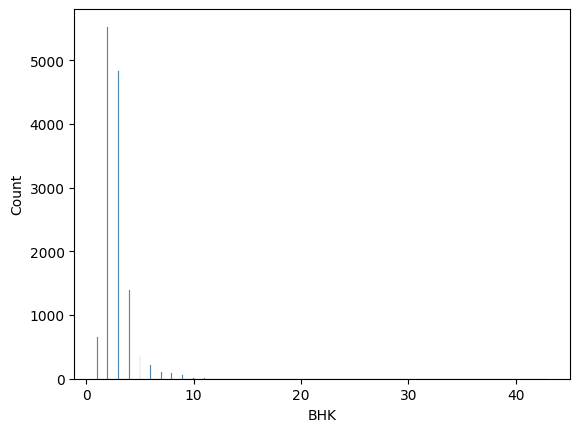

<Figure size 800x400 with 0 Axes>

In [66]:
sns.boxplot(x='BHK',data =df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='BHK',data =df)
plt.figure(figsize=(8,4))
plt.show()

In [67]:
## outliers are less in number so replacing with median
median = df['BHK'].quantile(0.50)
upper_bound = df['BHK'].quantile(0.95)
df['BHK']=np.where(df['BHK']>upper_bound,median,df['BHK'])

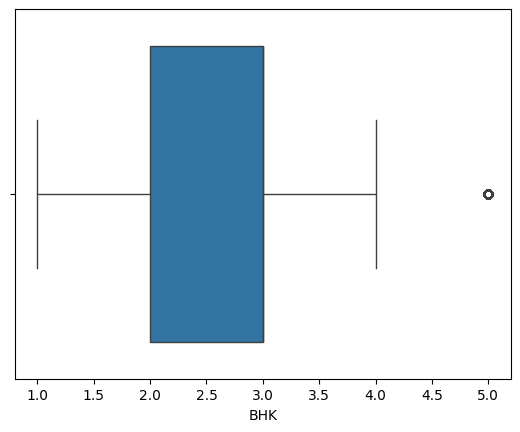

<Figure size 800x400 with 0 Axes>

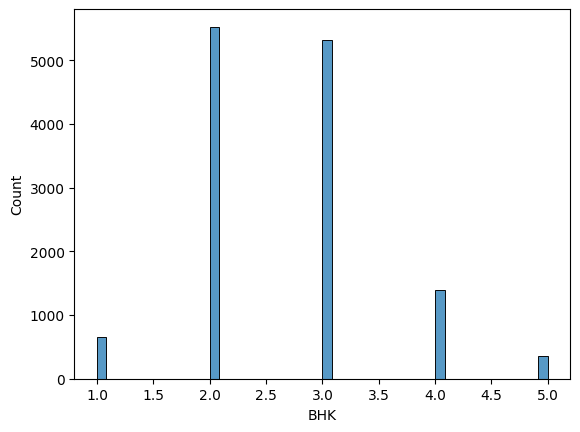

<Figure size 800x400 with 0 Axes>

In [68]:
sns.boxplot(x='BHK',data =df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='BHK',data =df)
plt.figure(figsize=(8,4))
plt.show()

In [69]:
## bathrooms

In [70]:
df['bathrooms']=df['bathrooms'].astype(int)

In [71]:
df['bathrooms'].shape

(13246,)

In [72]:
df[df['bathrooms'] > df['BHK']+2].shape

(383, 8)

In [73]:
df[~(df['bathrooms'] > df['BHK']+2)].shape

(12863, 8)

In [74]:
## unusual for a house to have no. of bathrooms > no. of bhk + 2 -> so removing those
df=df[~(df['bathrooms'] > df['BHK']+2)]

In [75]:
## sqft/BHK should be more than 300

In [76]:
df[df['total_sqft']/df['BHK']>300]


,area_type,location,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2,1,39.07,2.0,0.036998
1,Plot Area,others,2400.0,5,3,120.00,4.0,0.046154
2,Built-up Area,Uttarahalli,1440.0,2,3,62.00,3.0,0.043056
3,Super built-up Area,Lingadheeranahalli,1521.0,3,1,95.00,3.0,0.062459
4,Super built-up Area,Kothanur,1200.0,2,1,51.00,2.0,0.042500
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,2400.0,4,0,220.00,5.0,0.066898
13316,Super built-up Area,others,2400.0,5,1,220.00,4.0,0.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2,1,60.00,2.0,0.052585
13318,Super built-up Area,Padmanabhanagar,2400.0,4,1,220.00,4.0,0.104073


checking correlations

In [77]:
num_corr = df[['total_sqft','bathrooms','BHK','balcony']].corr()
num_corr

,total_sqft,bathrooms,BHK,balcony
total_sqft,1.000000,0.676318,0.647646,0.226340
bathrooms,0.676318,1.000000,0.828053,0.201100
BHK,0.647646,0.828053,1.000000,0.206974
balcony,0.226340,0.201100,0.206974,1.000000


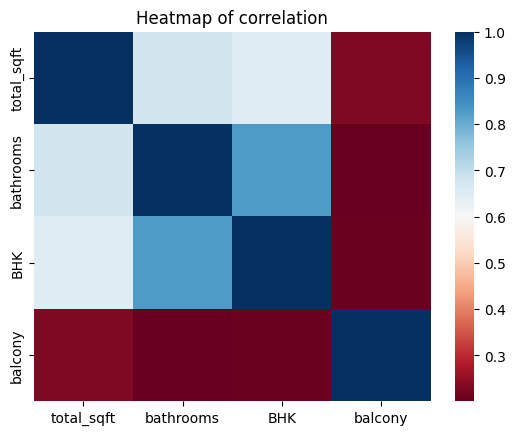

In [78]:
sns.heatmap(num_corr,cmap='RdBu')
plt.title('Heatmap of correlation')
plt.show()

In [79]:
corr_tot_pr = df[['total_sqft', 'price']].corr()
corr_tot_pr

,total_sqft,price
total_sqft,1.000000,0.778439
price,0.778439,1.000000


In [80]:
r,p =pearsonr(df['total_sqft'],df['price'])
print(f" r value is :{r}")
print(f" p value is :{p}")

 r value is :nan
 p value is :nan


In [81]:
corr_bat_pr = df[['bathrooms', 'price']].corr()
corr_bat_pr

,bathrooms,price
bathrooms,1.000000,0.694638
price,0.694638,1.000000


In [82]:
r,p =pearsonr(df['bathrooms'],df['price'])
print(f" r value is :{r}")
print(f" p value is :{p}")

 r value is :0.6946380053214556
 p value is :0.0


In [83]:
corr_bal_pr = df[['balcony', 'price']].corr()
corr_bal_pr

,balcony,price
balcony,1.000000,0.125052
price,0.125052,1.000000


In [84]:
r,p =pearsonr(df['balcony'],df['price'])
print(f" r value is :{r}")
print(f" p value is :{p}")

 r value is :0.12505230757120733
 p value is :5.3712490008673166e-46


In [85]:
corr_bhk_pr = df[['BHK', 'price']].corr()
corr_bhk_pr

,BHK,price
BHK,1.000000,0.640173
price,0.640173,1.000000


In [86]:
r,p =pearsonr(df['BHK'],df['price'])
print(f" r value is :{r}")
print(f" p value is :{p}")

 r value is :0.6401728245704814
 p value is :0.0


In [87]:
## problem 6

In [88]:
## checking the average price of each area_type
df_areas = df[['area_type','price']]
df_1 = df_areas.groupby('area_type',as_index=False).mean().sort_values(ascending=False,by='price')
df_1.rename(columns={'price':'average_price'},inplace=True)
df_1.set_index('area_type',inplace=True)
df_1.head()

,average_price
area_type,
Plot Area,139.557426
Built-up Area,89.889024
Carpet Area,84.717384
Super built-up Area,82.203013


In [89]:
## checking the average price of each location
df_locations = df[['location','price']]
df_2= df_locations.groupby('location',as_index=False).mean().sort_values(ascending=False,by='price')
df_2.rename(columns={'price':'average_price'},inplace=True)
df_2.set_index('location',inplace=True)
df_2.head()

,average_price
location,
Rajaji Nagar,187.831600
2nd Stage Nagarbhavi,185.045455
Iblur Village,182.240000
Frazer Town,176.456944
Indira Nagar,170.047619


In [90]:
df_3 = df[['area_type','location','price']]
df_3 = df_3.groupby(['area_type','location'],as_index=False).mean().sort_values(ascending=False,by='price')
df_3.rename(columns={'price':'average_price'},inplace=True)
df_3.set_index('area_type',inplace=True)

## it will show the average price for each area_type and location
df_pvt = pd.pivot_table(df_3,index='area_type',columns='location',values='average_price')
df_pvt.head()

location,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
area_type,,,,,,,,,,,,,,,,,,,,,
Built-up Area,100.600000,132.500000,66.690000,84.166667,95.597200,109.125000,99.833333,NaN,73.216667,141.500000,...,48.800000,66.111111,119.800000,NaN,113.702593,128.333333,94.571714,51.545455,91.000000,94.744384
Carpet Area,NaN,220.000000,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,89.131351
Plot Area,206.666667,188.736842,175.000000,125.000000,158.125000,136.800000,118.400000,109.000000,124.400000,NaN,...,115.141250,112.770833,166.000000,NaN,159.517262,118.750000,138.437500,180.000000,115.500000,139.368440
Super built-up Area,153.593750,NaN,67.652174,108.593333,86.693604,57.225732,56.528571,39.946667,84.240000,89.610476,...,63.429286,53.464286,85.348214,71.188095,85.225081,72.653846,72.370541,59.937500,94.259348,85.364970


In [91]:
df.to_csv('cleaned_data.csv', index=False)

In [92]:
##Model Encoding

In [93]:
## one hot encoding for area_type
df_a=pd.get_dummies(df['area_type']).astype(int)
df = pd.concat([df,df_1],axis=1)
df.drop('area_type',axis=1,inplace=True)
df.head()

,location,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft,average_price
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,0.036998,NaN
1,others,2400.0,5.0,3.0,120.00,4.0,0.046154,NaN
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,0.043056,NaN
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,0.062459,NaN
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,0.042500,NaN


In [94]:
## one hot encoding for locations
df_l=pd.get_dummies(df['location']).astype(int)
df = pd.concat([df,df_l],axis=1)
df.drop('location',axis=1,inplace=True)
df.head()

,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft,average_price,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,1056.0,2.0,1.0,39.07,2.0,0.036998,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2400.0,5.0,3.0,120.00,4.0,0.046154,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1440.0,2.0,3.0,62.00,3.0,0.043056,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3.0,0.062459,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2.0,0.042500,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df.drop('average_price',axis=1,inplace=True)
df.head()

,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,1056.0,2.0,1.0,39.07,2.0,0.036998,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2400.0,5.0,3.0,120.00,4.0,0.046154,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1440.0,2.0,3.0,62.00,3.0,0.043056,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3.0,0.062459,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2.0,0.042500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


MODEL TRAINING

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
## input features
X = df.drop('price',axis=1)
X.head()

,total_sqft,bathrooms,balcony,BHK,price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,1056.0,2.0,1.0,2.0,0.036998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2400.0,5.0,3.0,4.0,0.046154,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1440.0,2.0,3.0,3.0,0.043056,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3.0,0.062459,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2.0,0.042500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
## target variable
Y = df['price']
Y.head()

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


In [99]:
# train -test split
X_train , X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20, random_state=40)

LINEAR REGRESSION

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
Y_train.fillna(0, inplace=True)
Y_test.fillna(0, inplace=True)

In [102]:
model_1=LinearRegression()
model_1.fit(X_train,Y_train)
Y_pred = model_1.predict(X_test)

In [103]:
## performance metrics

In [104]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold,cross_val_score

In [105]:
MSE = mean_squared_error(Y_test,Y_pred)
MSE

981.9456106914408

In [106]:
r2_val = r2_score(Y_test,Y_pred)
r2_val

0.6987933976331641

In [107]:
X.replace(np.nan,0,inplace=True)
Y.replace(np.nan,0,inplace=True)
cv=KFold(n_splits=5,random_state=None)
results = cross_val_score(LinearRegression(),X ,Y,cv=cv)
print(results.mean())

-1.3381790190423728


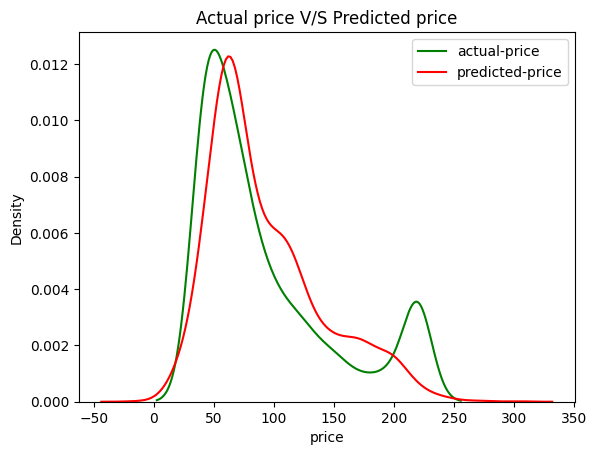

In [108]:
axis1=sns.kdeplot(x=Y_test,color='green',label = 'actual-price')
sns.kdeplot(x=Y_pred,color='red',label = 'predicted-price',ax=axis1)
plt.title('Actual price V/S Predicted price')
plt.legend(loc='best')
plt.show()

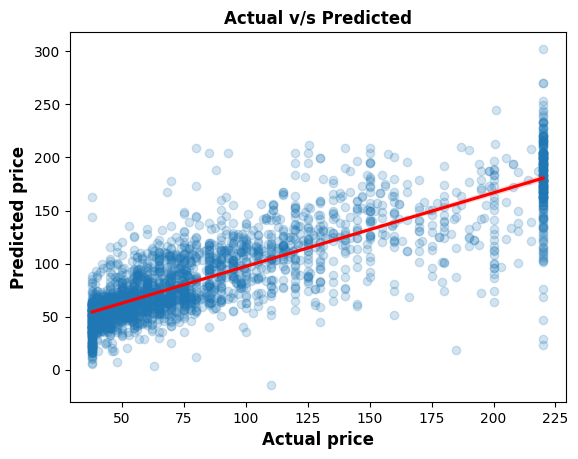

In [109]:
sns.regplot(x=Y_test,y=Y_pred ,scatter_kws={'alpha':0.2},line_kws={'color':'red'})
plt.title('Actual v/s Predicted', fontsize='large',fontweight='bold')
plt.xlabel('Actual price', fontsize='large',fontweight='bold')
plt.ylabel('Predicted price', fontsize='large',fontweight='bold')
plt.show()

Decision Tree

In [110]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
model_2= DecisionTreeRegressor(max_depth=4)
model_2.fit(X_train,Y_train)
Y_pred = model_2.predict(X_test)

In [112]:
MSE = mean_squared_error(Y_test,Y_pred)
MSE

286.584910928905

In [113]:
r2_val = r2_score(Y_test,Y_pred)
r2_val

0.9120916002163151

In [114]:
cv = KFold(n_splits=4,random_state=None)
results= cross_val_score(DecisionTreeRegressor(),X,Y,cv=cv)
print(results.mean())

0.9607016917246605


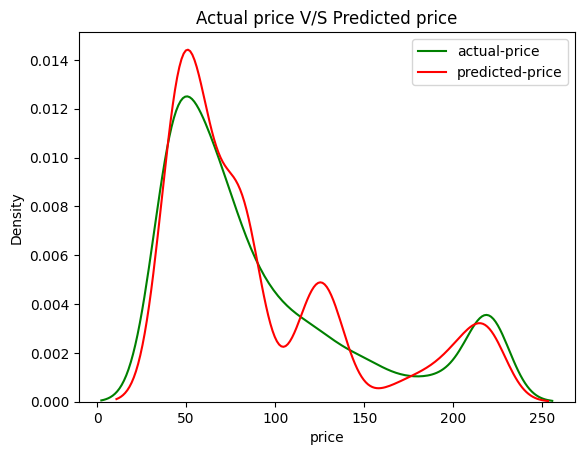

In [115]:
axis1=sns.kdeplot(x=Y_test,color='green',label = 'actual-price')
sns.kdeplot(x=Y_pred,color='red',label = 'predicted-price',ax=axis1)
plt.title('Actual price V/S Predicted price')
plt.legend(loc='best')
plt.show()

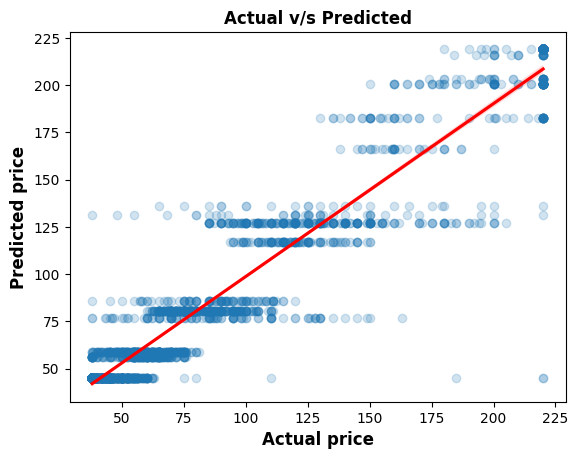

In [116]:
sns.regplot(x=Y_test,y=Y_pred ,scatter_kws={'alpha':0.2},line_kws={'color':'red'})
plt.title('Actual v/s Predicted', fontsize='large',fontweight='bold')
plt.xlabel('Actual price', fontsize='large',fontweight='bold')
plt.ylabel('Predicted price', fontsize='large',fontweight='bold')
plt.show()

Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
model_3 = RandomForestRegressor(max_depth=4,n_estimators=125)
model_3.fit(X_train,Y_train)
Y_pred = model_3.predict(X_test)

In [119]:
MSE = mean_squared_error(Y_test,Y_pred)
MSE

194.04785770041224

In [120]:
r2_val = r2_score(Y_test,Y_pred)
r2_val

0.9404768499618348

In [121]:
cv = KFold(n_splits=4,random_state=None)
results= cross_val_score(RandomForestRegressor(max_depth=4,n_estimators=125),X,Y,cv=cv)
print(results.mean())

0.935063718304756


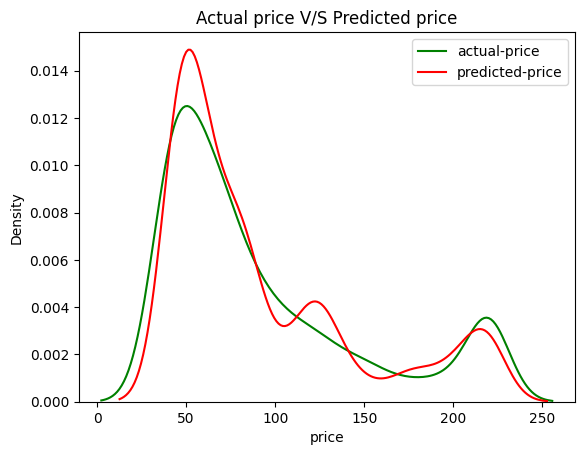

In [122]:
axis1=sns.kdeplot(x=Y_test,color='green',label = 'actual-price')
sns.kdeplot(x=Y_pred,color='red',label = 'predicted-price',ax=axis1)
plt.title('Actual price V/S Predicted price')
plt.legend(loc='best')
plt.show()

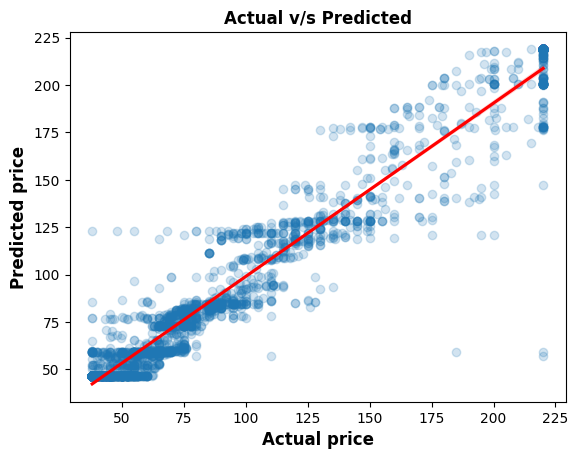

In [123]:
sns.regplot(x=Y_test,y=Y_pred ,scatter_kws={'alpha':0.2},line_kws={'color':'red'})
plt.title('Actual v/s Predicted', fontsize='large',fontweight='bold')
plt.xlabel('Actual price', fontsize='large',fontweight='bold')
plt.ylabel('Predicted price', fontsize='large',fontweight='bold')
plt.show()

In [124]:
## using RandomForestRegresor as it have best performance
## MSE -> lower the better
## r2_score -> higher the better
## cross_val_Score -> higher the better, should be close to r2_score

In [125]:
def predict_price(model, area_type, location, sqft, balcony, bathroom, BHK):
    x_input = np.zeros(len(X.columns))

    x_input[X.columns.get_loc('total_sqft')] = sqft
    x_input[X.columns.get_loc('bathrooms')] = bathroom
    x_input[X.columns.get_loc('balcony')] = balcony
    x_input[X.columns.get_loc('BHK')] = BHK

    if area_type in X.columns:
        x_input[X.columns.get_loc(area_type)] = 1

    if location in X.columns:
        x_input[X.columns.get_loc(location)] = 1

    return round(model.predict([x_input])[0], 2)


In [126]:
price = predict_price(model_3, 'Built-up  Area', 'Electronic City', 1000, 2, 2, 2)
print("Predicted Price:", price)

Predicted Price: 52.69


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [127]:
import pickle

with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(model_3, f)

In [128]:
from google.colab import files
files.download('house_price_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>